# Project Description -  Twitter US Airline Sentiment




## Objective:
To implement the techniques learnt as a part of the University of Texas AIML post-graduate course.

## Data Description
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from 
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed 
by categorizing negative reasons (such as "late flight" or "rude service").

## Learning Outcomes
- Basic understanding of text pre-processing.
- What to do after text pre-processing: 
- Bag of words
- Tf-idf
- Build the classification model.
- Evaluate the Model.

## Dataset
The project is from a dataset from Kaggle.
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
The dataset has to be downloaded from the above Kaggle website.
The dataset has the following columns:
- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- negativereason
- negativereason_confidence
- airline
- airline_sentiment_gold
- name
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location
- user_timezone

###  Import the libraries, load dataset, print shape of data, data description. (5 Marks)

In [68]:
import warnings
warnings.filterwarnings('ignore')

# Import the relevant Libraries
#import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
import nltk                                             
#nltk.download('stopwords')                             
#nltk.download('punkt')
#nltk.download('wordnet')

from nltk.corpus import stopwords                       
from nltk.tokenize import word_tokenize, sent_tokenize  
from nltk.stem.wordnet import WordNetLemmatizer         
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.stem import PorterStemmer

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [70]:
#load the dataset
twitter_data = pd.read_csv('Tweets.csv')

In [71]:
#print shape of data
print(twitter_data.shape)

(14640, 15)


In [72]:
twitter_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [73]:
#data description
twitter_data.info()
# the data consists of 15 columns with datatype as given below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [74]:
#Statistical summary
twitter_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


### Understand of data-columns: (5 Marks)
a. Drop all other columns except “text” and “airline_sentiment”.
b. Check the shape of data.
c. Print first 5 rows of data.

In [75]:
# identify the 13 columns to be dropped as per specifiecation.
columns = ['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone']

In [76]:
#drop the requested columns
twitter_data = pd.DataFrame(twitter_data.drop(columns,axis=1,inplace=False))

In [77]:
#check shape of data
twitter_data.shape

(14640, 2)

In [78]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

In [79]:
#print first 5 rows of data
twitter_data.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [80]:
def string_to_int(sentiment):
    if sentiment == "negative":
        return 0
    elif sentiment == "neutral":
        return 1
    elif sentiment == "positive": 
        return 2

In [81]:
# convert the sentiment ordinals to integers to aid the modeling
twitter_data.airline_sentiment= twitter_data['airline_sentiment'].apply(string_to_int)

In [82]:
twitter_data.head()

,airline_sentiment,text
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials to the experience... tacky.
2,1,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,0,@VirginAmerica and it's a really big bad thing about it


In [83]:
twitter_data.isnull().sum(axis=0)                                # Check for NULL values.
#there were no null values

airline_sentiment    0
text                 0
dtype: int64

### Text pre-processing: Data preparation. (20 Marks)
a. Html tag removal.
b. Tokenization.
c. Remove the numbers.
d. Removal of Special Characters and Punctuations.
e. Conversion to lowercase.
f. Lemmatize or stemming.
g. Join the words in the list to convert back to text string in the dataframe. (So that each row 
contains the data in text format.)
h. Print first 5 rows of data after pre-processing.

#####  first-stage text pre-processing: Data preparation

In [84]:
#Html tag removal
from bs4 import BeautifulSoup
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
twitter_data['text'] = twitter_data['text'].apply(lambda x: strip_html(x))
twitter_data.head()

,airline_sentiment,text
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials to the experience... tacky.
2,1,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,0,@VirginAmerica and it's a really big bad thing about it


In [85]:
#remove numbers
#Import Regex, string and unicodedata.
import re, string, unicodedata                           
import re
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

twitter_data['text'] = twitter_data['text'].apply(lambda x: remove_numbers(x))
twitter_data.head()

,airline_sentiment,text
0,1,@VirginAmerica What @dhepburn said.
1,2,@VirginAmerica plus you've added commercials to the experience... tacky.
2,1,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,0,@VirginAmerica and it's a really big bad thing about it


In [86]:
#tokenization
twitter_data['text'] = twitter_data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

#####  second-stage text pre-processing: Data preparation

In [87]:
# Global Parameters
stopwords = stopwords.words('english')
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.
stopwords = list(set(stopwords) - set(customlist))  

In [88]:
# in this work we chose to use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

#remove special characters
def remove_accented_chars(words):
    """Remove accented characters i.e. non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# coversion to lower case
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# remove punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# remove stopwords
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# in this work we chose to use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def preprocess(words):
    words = remove_accented_chars(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

twitter_data['text'] = twitter_data.apply(lambda row: preprocess(row['text']), axis=1)


In [89]:
# print first five rows of data after pre-processing
twitter_data.head()

,airline_sentiment,text
0,1,virginamerica dhepburn say
1,2,virginamerica plus add commercials experience tacky
2,1,virginamerica nt today must mean need take another trip
3,0,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,0,virginamerica really big bad thing


### Vectorization: (10 Marks)
a. Use CountVectorizer.
b. Use TfidfVectorizer.

In [90]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Keep only 1000 features as number of features will increase the processing
count_vectorizer = CountVectorizer(max_features=1000)                

In [91]:
# Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Keep only 1000 features as number of features will increase the processing
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

### Fit and evaluate model using both type of vectorization. (6+6 Marks)

In [92]:
sentiment = twitter_data['airline_sentiment']
sentiment = sentiment.astype('int')

In [93]:
sentiment.value_counts()
# in the sentiment data, there were a total of 9178 negative sentiments, 3099 neutral sentiments and 2363 postive sentiments

0    9178
1    3099
2    2363
Name: airline_sentiment, dtype: int64

#### Fit and evaluate model using count vectorization

In [94]:
data_features_count = count_vectorizer.fit_transform(twitter_data['text'])
data_features_count = data_features_count.toarray()                        # Convert the data features to array.

In [95]:
data_features_count.shape

(14640, 1000)

In [96]:
# Split data into training and testing set.
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features_count, sentiment, test_size=0.3, random_state=22)

In [97]:
# Build model using Random Forest Classifier.
# Also calculating the cross validation score.
forest_count = RandomForestClassifier(n_estimators=15, n_jobs=4)
forest_count = forest_count.fit(X_train, y_train)
print(forest_count)
print(np.mean(cross_val_score(forest_count, data_features_count, sentiment, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7137295081967213


In [98]:
# Predict the result for test data using the model built above.
result_count = forest_count.predict(X_test)
result_count

array([0, 0, 0, ..., 0, 0, 0])

[[2454  220   98]
 [ 404  433   93]
 [ 179  119  392]]


<AxesSubplot:>

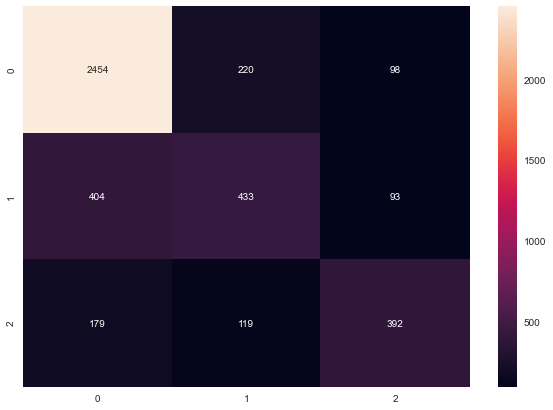

In [99]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

conf_mat = confusion_matrix(y_test, result_count)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [100]:
# As can be observed the data is imbalanced as the majority of the sentiments is negative

#### Fit and evaluate model using Tfidf vectorization

In [101]:
# tokenize and build vocab
vectorizer = tfidf_vectorizer.fit(twitter_data['text'])
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
data_features_tfidf = vectorizer.fit_transform(twitter_data['text'])
# summarize encoded vector
data_features_tfidf = data_features_tfidf.toarray()                        # Convert the data features to array.

{'virginamerica': 940, 'say': 765, 'plus': 667, 'add': 12, 'experience': 314, 'nt': 607, 'today': 882, 'must': 582, 'mean': 543, 'need': 587, 'take': 858, 'another': 45, 'trip': 897, 'really': 709, 'entertainment': 292, 'face': 320, 'little': 511, 'big': 103, 'bad': 87, 'thing': 868, 'seriously': 780, 'would': 984, 'pay': 646, 'flight': 351, 'seat': 769, 'play': 664, 'fly': 360, 'yes': 994, 'every': 301, 'time': 878, 'win': 969, 'go': 392, 'away': 82, 'miss': 569, 'without': 973, 'https': 437, 'well': 964, 'amaze': 37, 'arrive': 63, 'hour': 430, 'early': 276, 'good': 396, 'know': 479, 'second': 771, 'lead': 490, 'cause': 140, 'pretty': 680, 'much': 579, 'better': 101, 'great': 397, 'deal': 228, 'already': 34, 'think': 870, 'nd': 586, 'even': 298, 'st': 821, 'yet': 996, 'sky': 798, 'travel': 893, 'http': 436, 'thank': 867, 'schedule': 766, 'still': 832, 'mia': 555, 'excite': 308, 'first': 345, 'cross': 210, 'country': 202, 'lax': 488, 'mco': 541, 'hear': 412, 'nothing': 603, 'things': 8

In [102]:
data_features_tfidf.shape

(14640, 1000)

In [103]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features_tfidf, sentiment, test_size=0.3, random_state=22)

In [104]:
forest_tfidf = RandomForestClassifier(n_estimators=15, n_jobs=4)

forest_tfidf = forest_tfidf.fit(X_train, y_train)

print(forest_tfidf)

print(np.mean(cross_val_score(forest_tfidf, data_features_tfidf, sentiment, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7110655737704918


In [105]:
# Predict the result for test data using the model built above.
result_tfidf = forest_tfidf.predict(X_test)
result_tfidf

array([0, 0, 1, ..., 0, 0, 0])

[[2553  148   71]
 [ 463  394   73]
 [ 224  103  363]]


<AxesSubplot:>

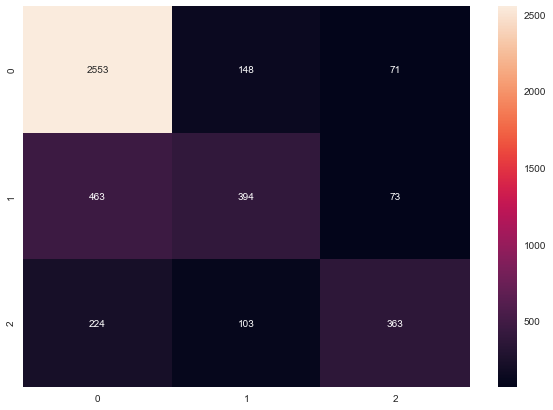

In [106]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

conf_mat = confusion_matrix(y_test, result_tfidf)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

###  Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

#### Evaluate the relative performance of the two vectorizer-based models

In [107]:
acc_count = accuracy_score(y_test, result_count)
print(acc_count)

0.7465846994535519


In [108]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Count_Vectorizer'], 'accuracy': acc_count})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Count_Vectorizer,0.746585


In [109]:
acc_tfidf = accuracy_score(y_test, result_tfidf)
print(acc_tfidf)

0.7536429872495446


In [63]:
tempResults = pd.DataFrame({'Method':['Tfidf'], 'accuracy': acc_tfidf})
resultsDf = pd.concat([resultsDf, tempResults])
#resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf#Store the accuracy results for each model in a dataframe for final comparison

,Method,accuracy
0,Count_Vectorizer,0.739071
0,Tfidf,0.754554


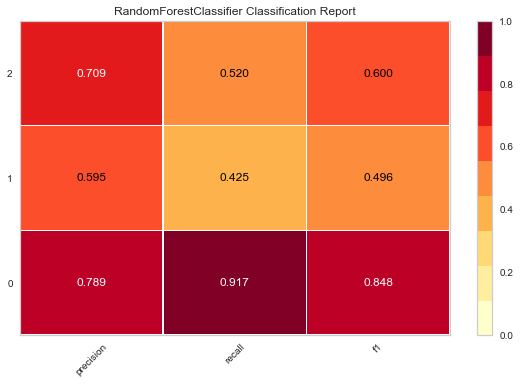

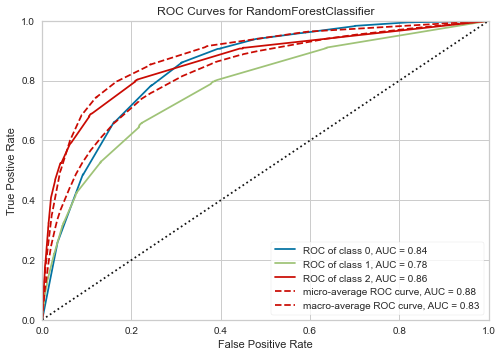

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [64]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators=15, max_samples= None, bootstrap=True, oob_score=True, random_state=None))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators=10, max_samples= None, bootstrap=True, oob_score=True, random_state=None))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

####  Summary of  my understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset

Summary:

- In this project we developed a sentiment analysis model about the problems of each major U.S. airline.
- The dataset used was Twitter data that was scraped from February of 2015 in which contributors to the data gathered were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").
- In this work we considered only he 2 columns “text” and “airline_sentiment”
- We Pre-processed the data using various techniques and libraries.
- The preprocessing included: the data by stripping unwanted characters, removing stopwords and performing other basic preprocessing steps as given in the introduction.
- Next we extracted the features by converting the text to numeric vector representations for use in training our machine learning model. In this work we made use of two vectorizers namely: CountVectorizer and the Term Frequency Inverse Document (TFIDF) Vectorizer. 
- We used the vectorizer to convert each tweet into a vector. The vector captured the relationship between the words in a review text and their presence in the entire dataset
- We split our data into two namely: training data set and test data. The split was 70%:30% with 70% used for training data and the remaining 30% used for test data.
- We then  trained the model and evaluated the performance by prediction using the test dataset.
- We then used RandomForestClassifier(RFC) to build our model. The RFC is a supervised machine-learning algorithm that was used to train sentiment classification models.
- In order to check our model’s accuracy we made use of the accuracy_score() method.
- We achieved an accuracy of 74.6% with the Countvector-based model   and 75.3% with the tfidf vectorizer-based model
- The accuracy achieved by our models were reasonable. However performance could be improved by consideration of hyperparameter optimization and use of other more powerful machine learning models. We could also have investigated various variations of the preprocessing steps and algorithms
- However, we can still increase the accuracy of our model by increasing the dataset we took into account for the model building 